# **Relacion entre la altitud, precipitación y temperatura en Guatemala**
Paris Rivera

# **Descripción**

Este proyecto se centra en el análisis de datos de 48 estaciones locales de precipitación y temperatura anual del año 1970. Utilizando técnicas de clustering como K-Means y Affinity Propagation, así como Análisis de Componentes Principales (PCA), se busca identificar patrones y agrupamientos significativos en los datos. Además, se visualizan las estaciones en un mapa y se realiza un análisis gráfico para comprender mejor la relación entre las variables estudiadas.

# **Introducciòn**
La comprensión del clima y sus variaciones es fundamental para diversas disciplinas, desde la meteorología hasta la agricultura y la planificación urbana. Las estaciones meteorológicas proporcionan datos esenciales sobre variables como la precipitación y la temperatura, que son cruciales para predecir el clima y tomar decisiones informadas. Sin embargo, la influencia de la altitud sobre estas variables no siempre se ha comprendido completamente, lo que limita la capacidad de desarrollar modelos climáticos precisos y estrategias de adaptación eficaces. En este estudi, se analizan datos históricos de 1970 para explorar patrones de precipitación y temperatura en diferentes altitudes.


# **Antecedentes**

El análisis de datos de estaciones meteorológicas a través de técnicas de clustering y análisis de componentes principales (PCA) permite identificar patrones y relaciones que no son evidentes a simple vista. Estas técnicas han evolucionado significativamente en las últimas décadas. Por ejemplo, el método K-Means, desarrollado hace más de 50 años, sigue siendo una herramienta potente y ampliamente utilizada para el agrupamiento de datos debido a su simplicidad y eficiencia (Jain, 2010). Además, la propagación de afinidad (Affinity Propagation) es una técnica más reciente que ofrece una perspectiva alternativa sobre el agrupamiento de datos, permitiendo identificar agrupamientos basados en la similitud de datos de entrada sin necesidad de predefinir el número de clusters (Pedregosa et al., 2011).

El uso de herramientas como Scikit-learn y Geopandas ha facilitado enormemente la implementación de estos métodos en Python. Scikit-learn es una biblioteca robusta que ofrece una variedad de algoritmos de aprendizaje automático, incluyendo K-Means y Affinity Propagation, y es ampliamente utilizada en la investigación y la industria debido a su versatilidad y rendimiento (Pedregosa et al., 2011). Por otro lado, Geopandas permite manejar y visualizar datos geoespaciales de manera eficiente, lo que es crucial para proyectos que involucran datos de estaciones meteorológicas dispersas geográficamente.

La normalización de datos es un paso crítico antes de aplicar técnicas de clustering, ya que asegura que todas las variables contribuyan de manera equitativa al análisis. Una vez normalizados los datos, el método del codo se puede utilizar para determinar el número óptimo de clusters en K-Means, lo que ayuda a identificar patrones de agrupamiento significativos (Bishop, 2006). El Análisis de Componentes Principales (PCA) es otra técnica fundamental en este tipo de análisis, ya que permite reducir la dimensionalidad de los datos y destacar las variables que más contribuyen a la variabilidad observada (Bishop, 2006).

# **Problema**

La falta de comprensión sobre cómo la altitud influye en la precipitación y la temperatura en diferentes regiones ha limitado la capacidad para predecir y adaptarse a las variaciones climáticas. Aunque se dispone de datos históricos de estaciones meteorológicas, no se han aplicado técnicas avanzadas de análisis de datos para identificar patrones y relaciones significativas entre estas variables. Esto ha dificultado el desarrollo de modelos climáticos precisos y la formulación de políticas efectivas en sectores críticos como la agricultura, la gestión de recursos hídricos y la planificación urbana.

# **Objetivo**

Identificar patrones de agrupamiento en las estaciones meteorológicas en función de las variables de precipitación, temperatura y altitud.

# **Datos Utilizados**
Estaciones meteorológicas: 48 estaciones locales.
Variables: Precipitación anual, temperatura anual, altitud.
Año: 1970.
Formato: CSV y shapefile para el mapa geográfico.

In [ ]:
from google.colab import drive # montar Google Drive en el entorno de Google Colab para acceder a los archivos
import geopandas as gpd # para trabajar con datos geoespaciales.
import pandas as pd # Manipulación y análisis de datos
import matplotlib.pyplot as plt # creación de gráficos y visualizaciones
import numpy as np # cálculo numérico
import seaborn as sns # para dibujar gráficos estadísticos atractivos
from sklearn.cluster import KMeans, AffinityPropagation # librería de aprendizaje automático
from sklearn.decomposition import PCA # Análisis de componentes principale
from sklearn.preprocessing import StandardScaler # normalizar datos
from sklearn.metrics import pairwise_distances_argmin_min #Calcula las distancias por pares y retorna los índices y distancias mínimas.



# Montar Google Drive
drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
import os

# Listar archivos en el directorio especificado
path = '/content/drive/My Drive/Lo_curso_python_2024/shapefile'
files = os.listdir(path)
print(files)

['departamentos.shp.xml', 'departamentos.prj', 'departamentos.shx', 'departamentos.sbx', 'departamentos.sbn', 'departamentos.dbf', 'departamentos.shp']


In [ ]:

# Ruta al archivo shape
shape_file_path = '/content/drive/My Drive/Lo_curso_python_2024/shapefile/departamentos.shp'

# Leer el archivo shape
gdf = gpd.read_file(shape_file_path)

# Verificar las columnas del GeoDataFrame
print("Columnas en el GeoDataFrame:")
print(gdf.columns)

# Mostrar una lista de los nombres de los departamentos
departamento_column = 'DEPARTAMEN'  #
if departamento_column in gdf.columns:
    print("\nLista de departamentos:")
    print(gdf[departamento_column].unique())
else:
    print(f"La columna '{departamento_column}' no se encuentra en el GeoDataFrame. Por favor, verifica el nombre de la columna.")


Columnas en el GeoDataFrame:
Index(['DEPTOS4_', 'DEPTOS4_ID', 'DEPARTAMEN', 'COUNT', 'Incendios',
       'geometry'],
      dtype='object')

Lista de departamentos:
['Petén' 'Quiché' 'Huehuetenango' 'Alta Verapaz' 'Izabal' 'San Marcos'
 'Baja Verapaz' 'Zacapa' 'Totonicapán' 'Quetzaltenango' 'El Progreso'
 'Chiquimula' 'Chimaltenango' 'Guatemala' 'Sololá' 'Jalapa' 'Sacatepéquez'
 'Retalhuleu' 'Suchitepéquez' 'Jutiapa' 'Santa Rosa' 'Escuintla']


In [ ]:

# Ruta al archivo CSV
csv_file_path = '/content/drive/My Drive/Lo_curso_python_2024/Estaciones.csv'

# Leer el archivo CSV con la codificación 'latin1' y el delimitador ';'
df_estaciones = pd.read_csv(csv_file_path, encoding='latin1', delimiter=';')

# Mostrar las estaciones con su información como tabla
print("\nEstaciones con su información:")
print(df_estaciones)






Estaciones con su información:
                    Estación     Departamento                   Municipio  \
0                Alameda ICTA   Chimaltenango                    El Tejar   
1                      Chixoy           Quiché                   Chicamán   
2                     Cubulco     Baja Verapaz                    Cubulco   
3                  El Capitán           Sololá          San Lucas Tolimán   
4                  El Tablón            Sololá      Santa María El Tablón   
5                   INSIVUMEH       Guatemala                  Guatemala    
6                 Los Albores     El Progreso   San Agustín Acasaguastlán   
7               Los Esclavos        Santa Rosa                    Cuilapa   
8                   Sacapulas           Quiché                  Sacapulas   
9               San Jerónimo      Baja Verapaz              San Jerónimo    
10     San Martín Jilotepeque   Chimaltenango     San Martín Jilotepeque    
11        Santa Cruz Balanyá    Chimaltenang

In [ ]:
# Verificar los nombres de las columnas
print("\nNombres de las columnas en el DataFrame de estaciones:")
print(df_estaciones.columns)




Nombres de las columnas en el DataFrame de estaciones:
Index(['Estación ', 'Departamento ', 'Municipio', 'Latitud ', 'Longitud ',
       'Elevación ', 'pp', 't_max', 't_mean', 't_min'],
      dtype='object')


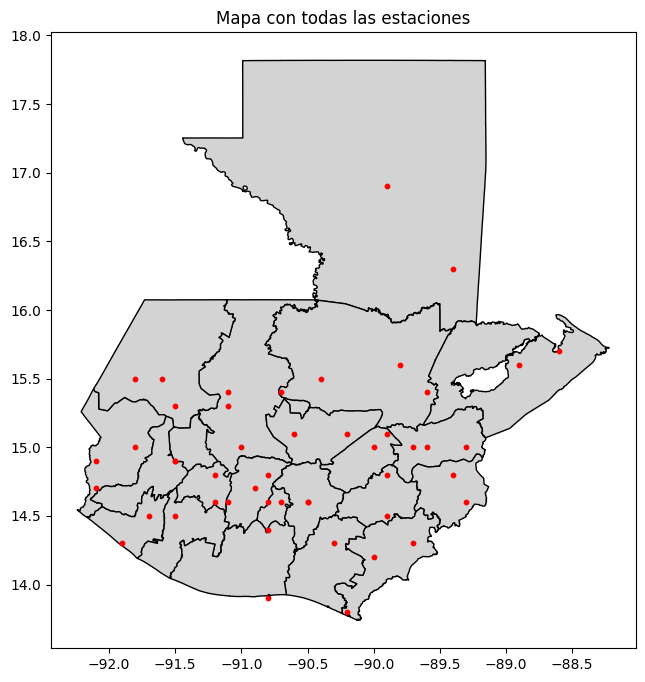

In [ ]:
# Usar los nombres de las columnas para longitud y latitud
# Reemplaza 'Longitud' y 'Latitud' con los nombres correctos
longitud_col = 'Longitud '
latitud_col = 'Latitud '

# Convertir el DataFrame de estaciones a un GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(
    df_estaciones,
    geometry=gpd.points_from_xy(df_estaciones[longitud_col], df_estaciones[latitud_col]),
    crs="EPSG:4326"
)

# Graficar todas las estaciones
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')  # Mapa base con los departamentos
gdf_estaciones.plot(ax=ax, color='red', markersize=10)  # Estaciones
plt.title('Mapa con todas las estaciones')
plt.show()

In [ ]:
# Verificar las columnas
print(df_estaciones.columns)

# Mostrar las primeras filas del DataFrame
print(df_estaciones.head())

Index(['Estación ', 'Departamento ', 'Municipio', 'Latitud ', 'Longitud ',
       'Elevación ', 'pp', 't_max', 't_mean', 't_min'],
      dtype='object')
      Estación    Departamento               Municipio  Latitud   Longitud   \
0  Alameda ICTA  Chimaltenango                El Tejar      14.6      -90.8   
1        Chixoy          Quiché               Chicamán      15.4      -90.7   
2       Cubulco    Baja Verapaz                Cubulco      15.1      -90.6   
3    El Capitán          Sololá      San Lucas Tolimán      14.6      -91.1   
4    El Tablón           Sololá  Santa María El Tablón      14.8      -91.2   

   Elevación       pp  t_max  t_mean  t_min  
0      1750.0   715.0   21.6    16.4   10.2  
1       680.0  1379.2   30.3    24.3   17.4  
2       994.0  1053.7   29.0    21.3   14.3  
3      1562.0  1086.2   24.5    18.3   12.0  
4      2397.0  1268.7   19.9    13.8    8.3  


In [ ]:
# Seleccionar las columnas necesarias
cols = ['Estación ', 'Departamento ', 'Municipio', 'Latitud ', 'Longitud ', 'Elevación ', 'pp', 't_max', 't_mean', 't_min']
df = df_estaciones[cols]

# Manejar datos faltantes (si es necesario)
df = df.dropna()

# Convertir a GeoDataFrame
gdf_estaciones = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitud '], df['Latitud ']),
    crs="EPSG:4326"
)


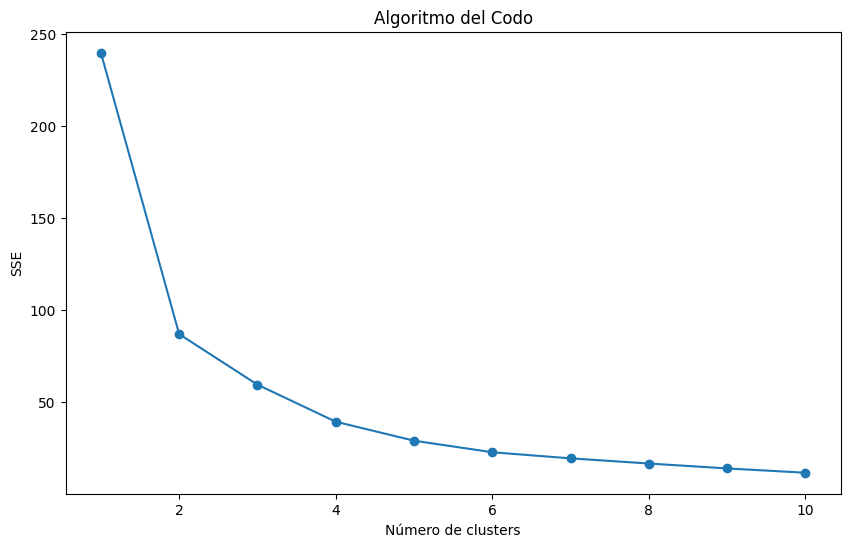

In [ ]:
# Analisis K.Means
# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['pp', 'Elevación ', 't_max', 't_mean', 't_min']])

# Algoritmo del codo para determinar el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Algoritmo del Codo')
plt.show()



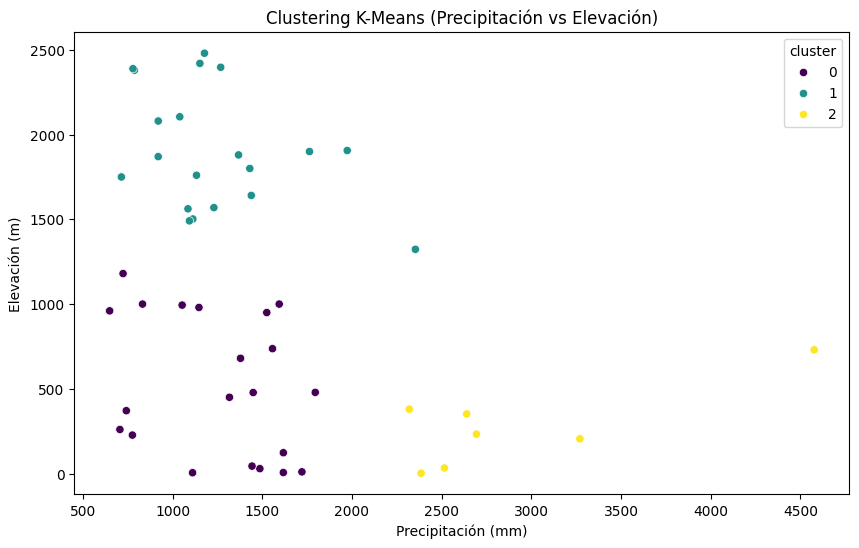

In [ ]:
# El número óptimo de clusters es 3 segun el codo
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pp'], y=df['Elevación '], hue=df['cluster'], palette='viridis')
plt.title('Clustering K-Means (Precipitación vs Elevación)')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Elevación (m)')
plt.show()

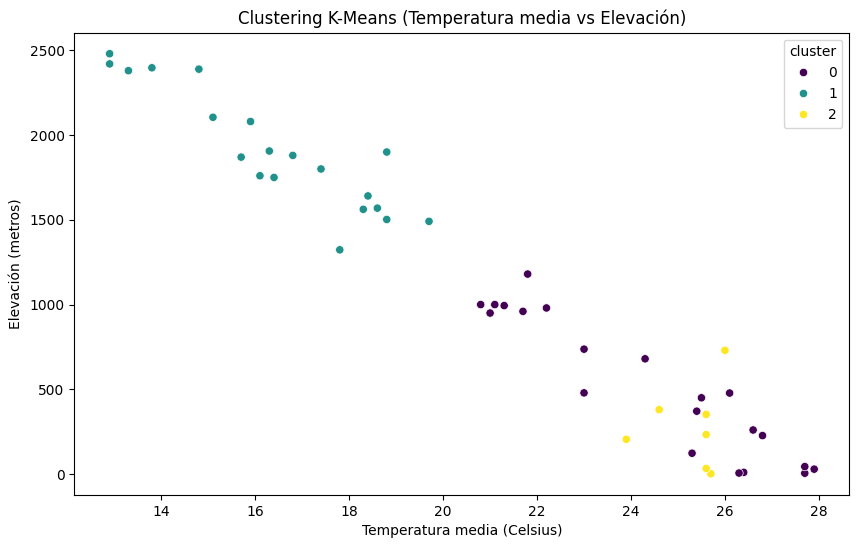

In [ ]:
# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['t_mean'], y=df['Elevación '], hue=df['cluster'], palette='viridis')
plt.title('Clustering K-Means (Temperatura media vs Elevación)')
plt.xlabel('Temperatura media (Celsius)')
plt.ylabel('Elevación (metros)')
plt.show()

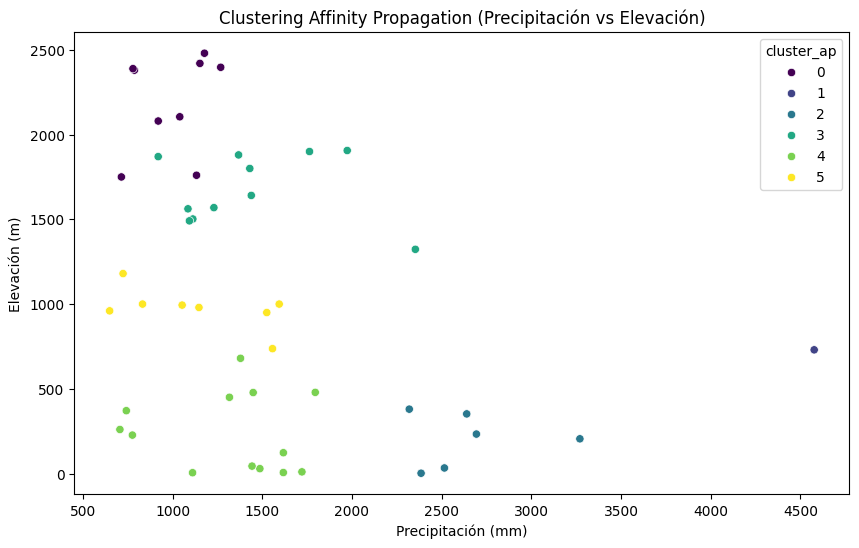

In [ ]:
# Análisis de Clustering Adicional (Affinity Propagation)
affinity_propagation = AffinityPropagation(random_state=0)
df['cluster_ap'] = affinity_propagation.fit_predict(df_scaled)

# Visualizar los clusters de Affinity Propagation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['pp'], y=df['Elevación '], hue=df['cluster_ap'], palette='viridis')
plt.title('Clustering Affinity Propagation (Precipitación vs Elevación)')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Elevación (m)')
plt.show()

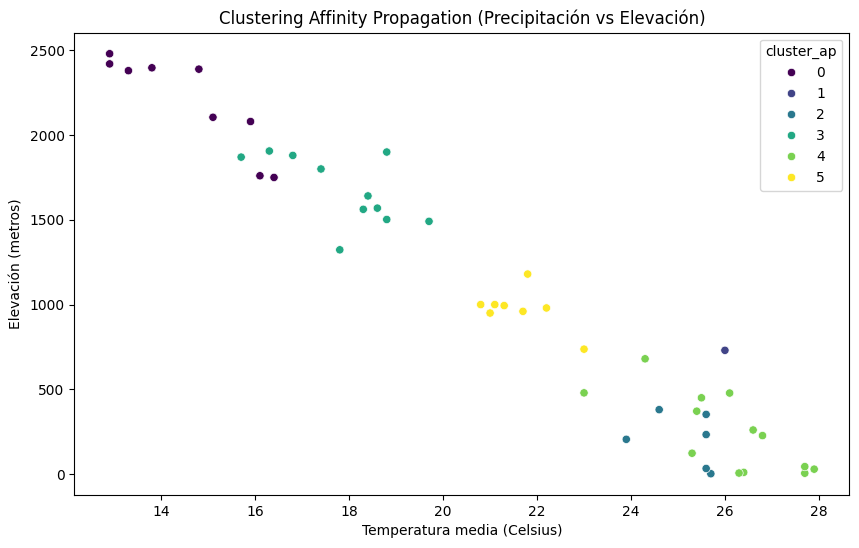

In [ ]:
# Análisis de Clustering Adicional (Affinity Propagation)
affinity_propagation = AffinityPropagation(random_state=0)
df['cluster_ap'] = affinity_propagation.fit_predict(df_scaled)

# Visualizar los clusters de Affinity Propagation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['t_mean'], y=df['Elevación '], hue=df['cluster_ap'], palette='viridis')
plt.title('Clustering Affinity Propagation (Precipitación vs Elevación)')
plt.xlabel('Temperatura media (Celsius)')
plt.ylabel('Elevación (metros)')
plt.show()

In [ ]:
# Cálculo de la matriz de covarianza
cov_matrix = np.cov(df_scaled.T)
print("Matriz de Covarianza:")
print(cov_matrix)

Matriz de Covarianza:
[[ 1.0212766  -0.37467708  0.33656224  0.36126372  0.38874311]
 [-0.37467708  1.0212766  -0.96917755 -0.99605225 -0.98637623]
 [ 0.33656224 -0.96917755  1.0212766   0.99395365  0.95952484]
 [ 0.36126372 -0.99605225  0.99395365  1.0212766   1.00091748]
 [ 0.38874311 -0.98637623  0.95952484  1.00091748  1.0212766 ]]


# **Resultados**

La matriz de covarianza proporciona información sobre la relación entre las variables. En este caso, las variables son la precipitación (pp), la elevación, y las temperaturas máximas (t_max), medias (t_men), y mínimas (t_min).

1.) Precipitación y Elevación: La covarianza positiva entre la precipitación y la elevación (0.3366) indica que a medida que la elevación aumenta, la precipitación tiende a aumentar. Esto es coherente con la noción de que las áreas montañosas tienden a recibir más precipitación que las áreas bajas.

2.) Temperaturas y Elevación: Las covarianzas negativas entre la elevación y las temperaturas (t_max, t_men, t_min) indican que a medida que la elevación aumenta, las temperaturas tienden a disminuir. Esto también es coherente con el hecho de que las áreas de mayor elevación suelen ser más frías.

3.) Precipitación y Temperaturas: Las covarianzas negativas entre la precipitación y las temperaturas indican que a medida que la precipitación aumenta, las temperaturas tienden a disminuir. Esto podría deberse al efecto de la lluvia en el enfriamiento del aire y la reducción de las temperaturas.

4.) Covarianzas entre las Temperaturas: Las covarianzas positivas entre las diferentes temperaturas (t_max, t_men, t_min) indican que estas variables tienden a moverse juntas en la misma dirección. Es decir, cuando una de las temperaturas aumenta, es probable que las otras también lo hagan, y viceversa.

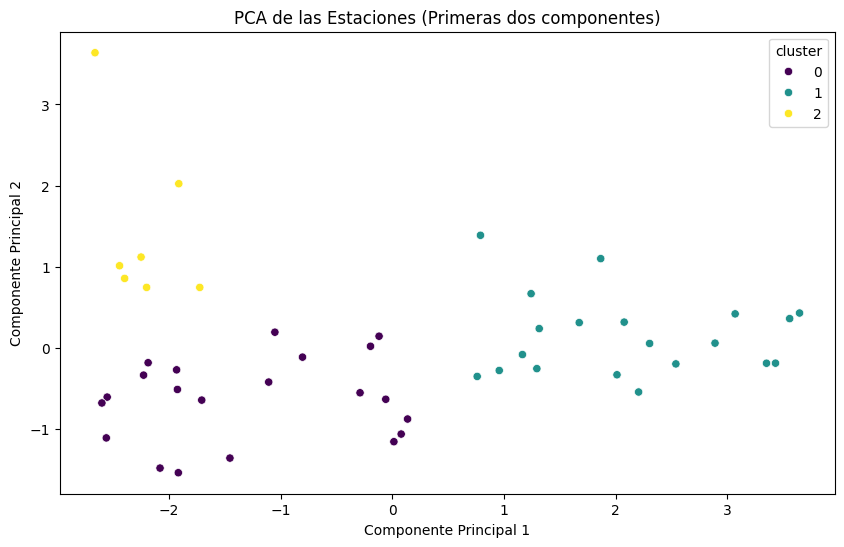

Varianza explicada por cada componente principal:
[0.81179678 0.16686039]


In [ ]:
# Análisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Convertir a DataFrame para facilidad de uso
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['cluster'] = kmeans.labels_

# Graficar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('PCA de las Estaciones (Primeras dos componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

In [ ]:
# Obtener los pesos de las características (loadings) de las dos primeras componentes principales
loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])

# Crear un DataFrame para visualizar los loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=['pp', 'Elevación', 't_max', 't_men', 't_min'])

# Mostrar los loadings
print("Loadings de las variables en las dos primeras componentes principales:")
print(loadings_df)




Loadings de las variables en las dos primeras componentes principales:
                PC1       PC2
pp        -0.463731  0.897833
Elevación  0.991971  0.094213
t_max     -0.980630 -0.134079
t_men     -0.999861 -0.114165
t_min     -0.992439 -0.077854


# **Resultados**
Los "loadings" en el análisis de componentes principales (PCA) representan la contribución de cada variable original a cada componente principal. Valores más altos (positivos o negativos) indican una mayor contribución de esa variable al componente principal correspondiente. Aquí hay una interpretación de los resultados para los loadings de las variables en las dos primeras componentes principales:

1.) Componente Principal 1 (PC1):
* Precipitación (pp): Tiene un loading negativo (-0.4637) en PC1. Esto significa que la precipitación tiene una fuerte contribución negativa a la dirección de PC1. Variables con loadings negativos altos en una componente principal tienden a estar inversamente relacionadas con esa componente.
* Elevación: Tiene un loading positivo (0.9919) en PC1. Esto indica una fuerte contribución positiva de la elevación a la dirección de PC1. Variables con loadings positivos altos en una componente principal tienden a estar directamente relacionadas con esa componente.
* Temperaturas (t_max, t_men, t_min): Todas las temperaturas tienen loadings negativos altos en PC1, con los valores más altos para t_men y t_min. Esto sugiere una fuerte contribución negativa de las temperaturas a la dirección de PC1. En otras palabras, las temperaturas más bajas están inversamente relacionadas con PC1.

2.) Componente Principal 2 (PC2):
* Precipitación (pp): Tiene un loading positivo (0.8978) en PC2. Esto indica una fuerte contribución positiva de la precipitación a la dirección de PC2. Variables con loadings positivos altos en una componente principal tienden a estar directamente relacionadas con esa componente.
* Elevación: Tiene un loading positivo (0.0942) en PC2, pero su valor es relativamente bajo en comparación con el de PC1. Aunque contribuye positivamente a PC2, su contribución es mucho menor que la de la precipitación.
* Temperaturas (t_max, t_men, t_min): Todas las temperaturas tienen loadings negativos en PC2, pero sus valores son relativamente bajos en comparación con PC1. Esto sugiere una contribución negativa de las temperaturas a PC2, pero es mucho menos significativa que su contribución a PC1.

3.) PC1 parece estar principalmente influenciado por la elevación y las temperaturas, mientras que PC2 está más influenciado por la precipitación. Esto sugiere que las estaciones con patrones similares de elevación y temperatura estarán más cercanas en el espacio de las dos primeras componentes principales, mientras que las estaciones con patrones similares de precipitación estarán más cercanas en la dirección de PC2.

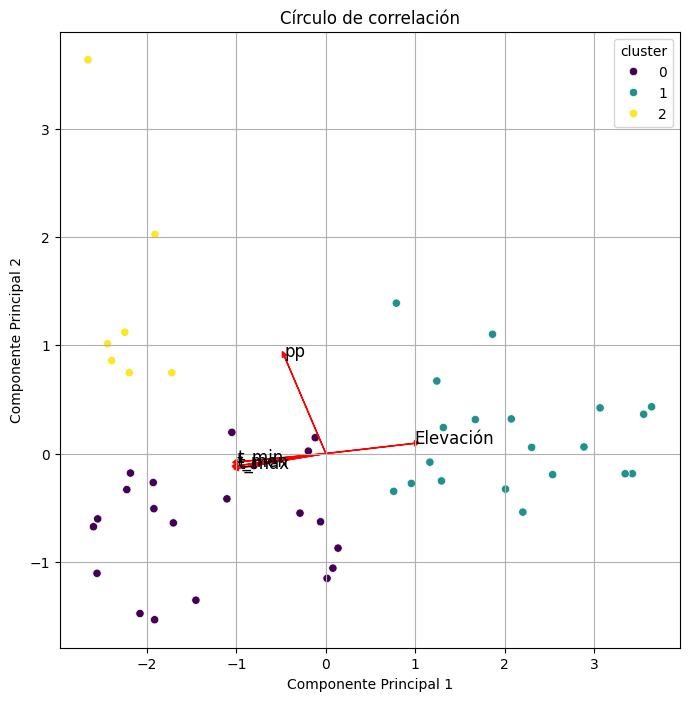

In [ ]:
# Graficar el círculo de correlación
plt.figure(figsize=(8, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue='cluster', palette='viridis')
for feature, (x, y) in loadings_df.iterrows():
    plt.arrow(0, 0, x, y, color='r', head_width=0.05, head_length=0.05)
    plt.text(x, y, feature, fontsize=12)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Círculo de correlación')
plt.grid()
plt.show()

# **Conclusiones**
* La normalización de datos y la aplicación de técnicas de clustering permitieron identificar agrupamientos significativos en las estaciones meteorológicas.
* El método del codo indicó que 3 clusters eran óptimos para el análisis de K-Means, revelando patrones distintos en las variables de precipitación y temperatura.
* Affinity Propagation proporcionó una perspectiva diferente de agrupamiento, mostrando cómo los métodos alternativos pueden ofrecer insights complementarios.

* El Análisis de Componentes Principales mostró que la altitud y la temperatura son las variables que explican la mayor parte de la variabilidad en los datos, mientras que la precipitación es la segunda componente principal.


# **Bibliografia**

* Jain, A. K. (2010). Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 31(8), 651-666.
* Scikit-learn: Machine Learning in Python. Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
* Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.
* "Clustering Algorithms: K-Means, Affinity Propagation" - Documentation from Scikit-learn library.
* "Geopandas: Python tools for geographic data" - Documentation from Geopandas library.
